C:\Users\Cassandra\AppData\Local\Temp\ipykernel_16984\2043327256.py:59: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date_naissance'] = pd.to_datetime(df['date_naissance'], errors='coerce').dt.year.astype('Int64')


<Figure size 1500x1000 with 0 Axes>

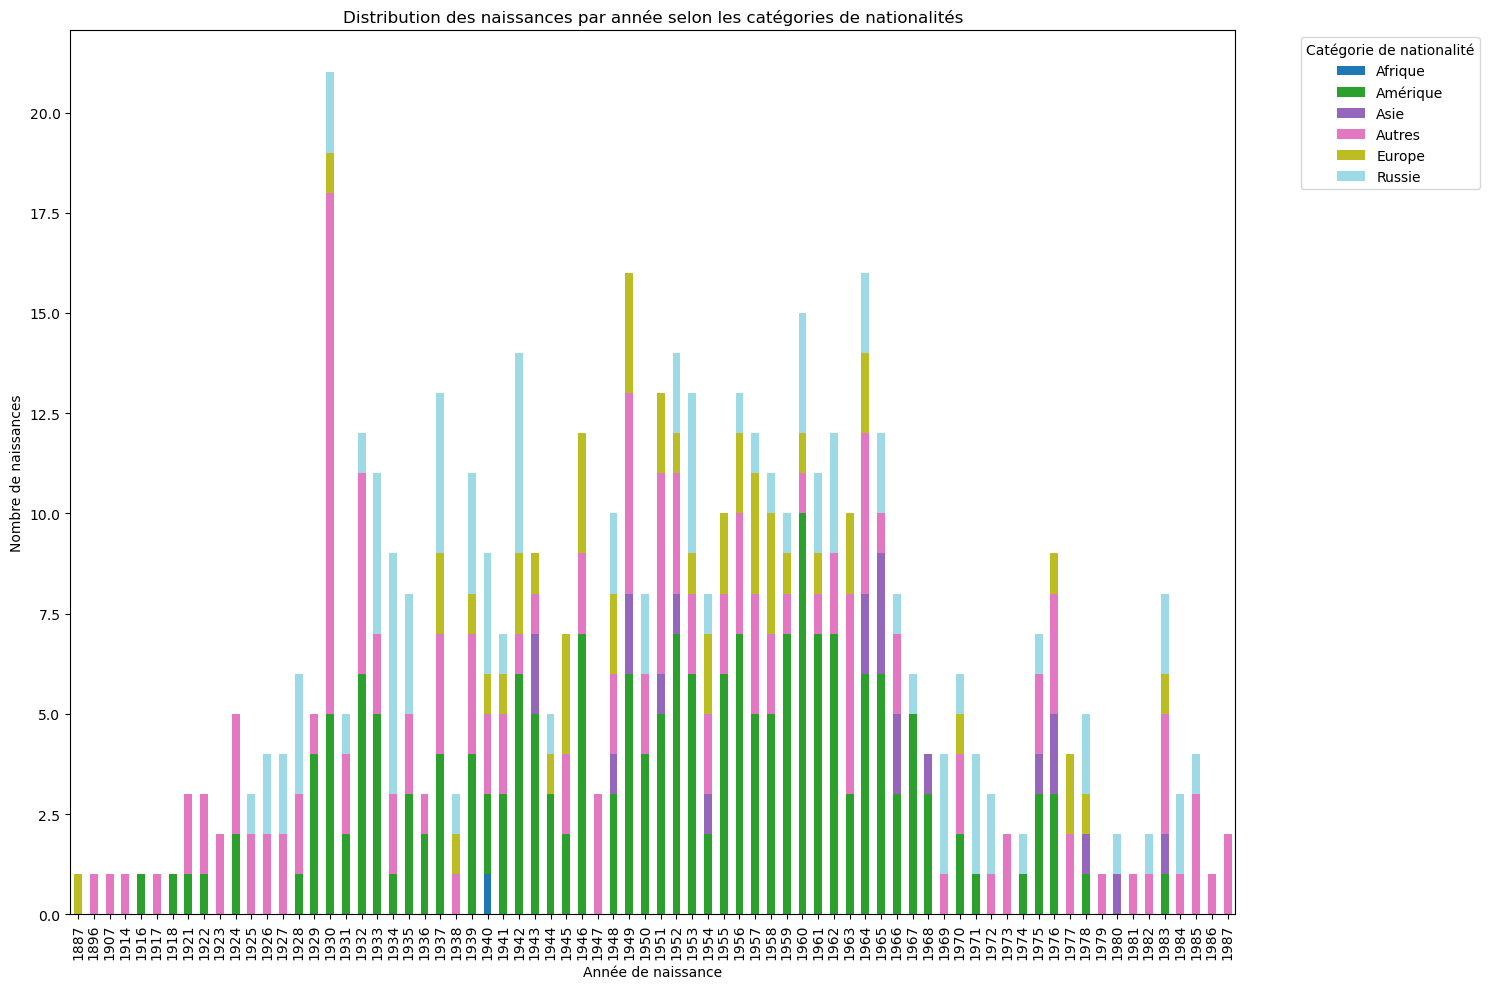

In [7]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connexion à la base de données SQLite
conn = sqlite3.connect('C:/Users/Cassandra/OneDrive/Documents/Université/UNINE/2024 - Printemps/Application de méthodes/Les_astronautes/astronautes.db')

# Chargement des données depuis la table "personne"
df = pd.read_sql_query("SELECT nationalite, date_naissance FROM personne", conn)

# Fermeture de la connexion à la base de données
conn.close()

# Création du mappage des nationalités en catégories
nationality_mapping = {
    'French': 'Europe',
    'German': 'Europe',
    'British': 'Europe',
    'Italian': 'Europe',
    'Spanish': 'Europe',
    'Swiss' : 'Europe',
    'Belgian' : 'Europe',
    'Belarusian' : 'Europe',
    'Czech Republic' : 'Europe',
    'Danish' : 'Europe', 
    'Dutch' : 'Europe',
    'Hungarians' : 'Europe',
    'Icelandic' : 'Europe',
    'Netherlands' : 'Europe',
    'Polish' : 'Europe',
    'Slovakia' : 'Europe',
    'Ukrainian' : 'Europe',
    'Russian': 'Russie',
    'Soviet Union' : 'Russie',
    'United States': 'Amérique',
    'American': 'Amérique',
    'Brazilian': 'Amérique',
    'Canadian': 'Amérique',
    'Cuban': 'Amérique',
    'Mexican' : 'Amérique',
    'Australian': 'Australie',
    'Chinese': 'Asie',
    'Japanese': 'Asie',
    'Indian': 'Asie',
    'Emirati' : 'Asie',
    'Indonesian' : 'Asie',
    'Israeli' : 'Asie', 
    'Kazakh' : 'Asie',
    'Malaysian' : 'Asie', 
    'Mongolian' : 'Asie', 
    'South Korean' : 'Asie',
    'South African': 'Afrique',
}

# les autres nationalités seront regroupées sous la catégorie "Autres"
df['categorie_nationalite'] = df['nationalite'].map(nationality_mapping).fillna('Autres')

# Extraire l'année à partir de la date de naissance
df['date_naissance'] = pd.to_datetime(df['date_naissance'], errors='coerce').dt.year.astype('Int64')

# Supprimer les lignes avec des valeurs manquantes
df.dropna(subset=['date_naissance', 'categorie_nationalite'], inplace=True)

# Compter le nombre de naissances par année et par catégorie de nationalité
birth_counts = df.groupby(['date_naissance', 'categorie_nationalite']).size().unstack(fill_value=0)

# Création du graphique en barres empilées
plt.figure(figsize=(15, 10))
birth_counts.plot(kind='bar', stacked=True, colormap='tab20', figsize=(15, 10))

# Titre et labels
plt.title('Distribution des naissances par année selon les catégories de nationalités')
plt.xlabel('Année de naissance')
plt.ylabel('Nombre de naissances')

# Légende
plt.legend(title='Catégorie de nationalité', bbox_to_anchor=(1.05, 1), loc='upper left')

# Afficher le graphique
plt.tight_layout()
plt.show()


C:\Users\Cassandra\AppData\Local\Temp\ipykernel_16984\4007432444.py:60: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date_naissance'] = pd.to_datetime(df['date_naissance'], errors='coerce').dt.year.astype('Int64')


<Figure size 1500x1000 with 0 Axes>

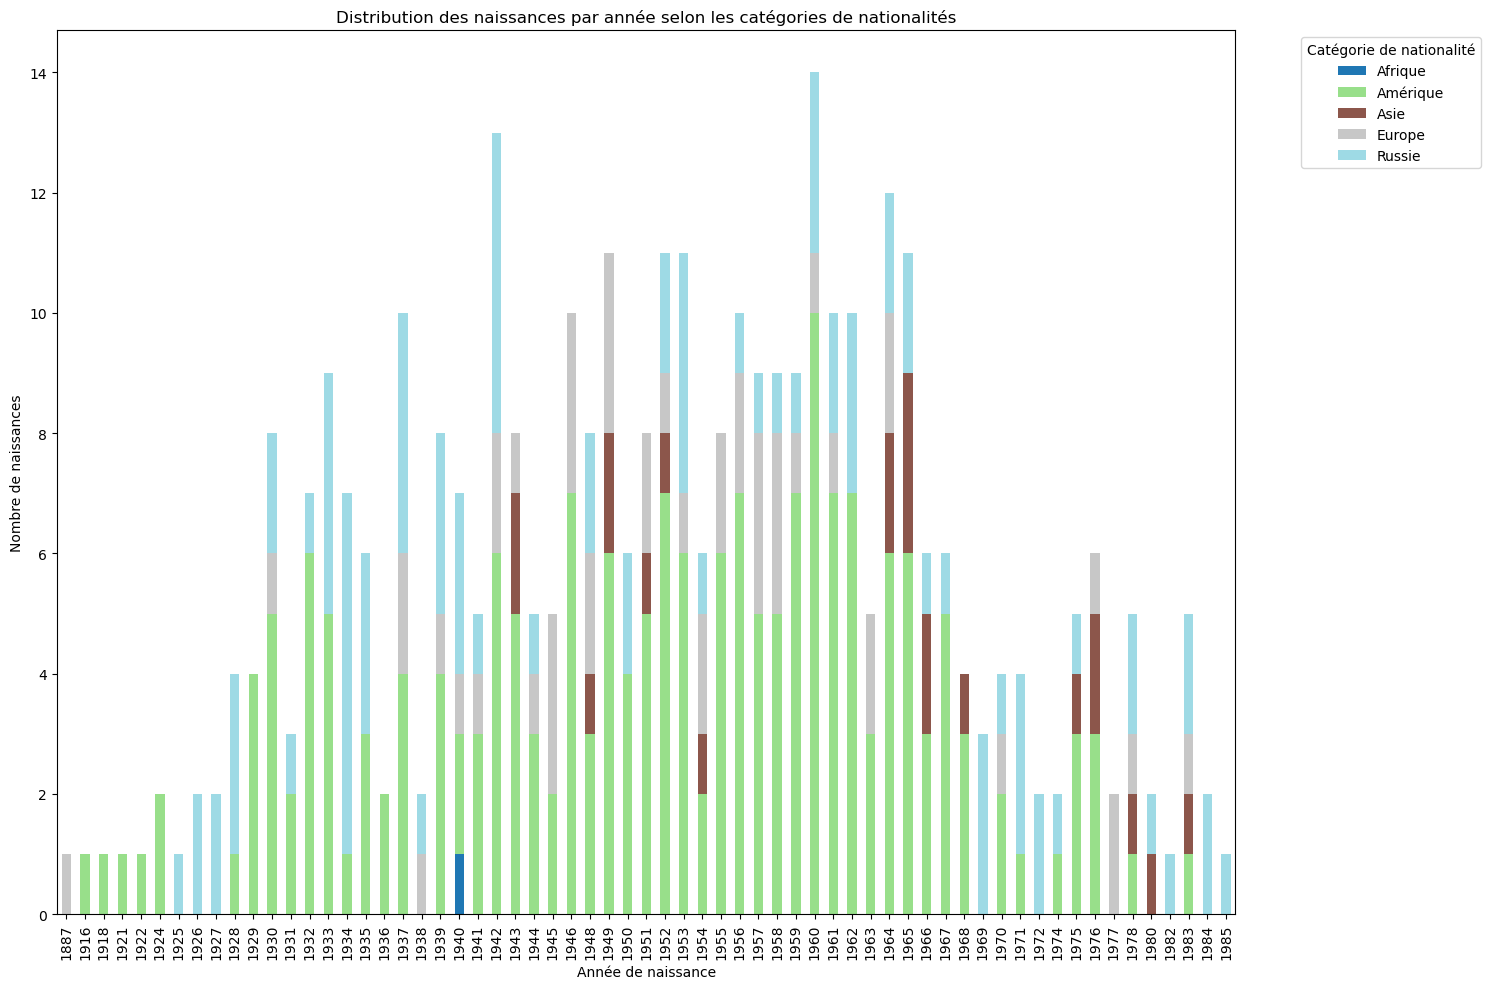

In [8]:
#### J'enlève les autres ####
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connexion à la base de données SQLite
conn = sqlite3.connect('C:/Users/Cassandra/OneDrive/Documents/Université/UNINE/2024 - Printemps/Application de méthodes/Les_astronautes/astronautes.db')

# Chargement des données depuis la table "personne"
df = pd.read_sql_query("SELECT nationalite, date_naissance FROM personne", conn)

# Fermeture de la connexion à la base de données
conn.close()

# Création du mappage des nationalités en catégories
nationality_mapping = {
    'French': 'Europe',
    'German': 'Europe',
    'British': 'Europe',
    'Italian': 'Europe',
    'Spanish': 'Europe',
    'Swiss' : 'Europe',
    'Belgian' : 'Europe',
    'Belarusian' : 'Europe',
    'Czech Republic' : 'Europe',
    'Danish' : 'Europe', 
    'Dutch' : 'Europe',
    'Hungarians' : 'Europe',
    'Icelandic' : 'Europe',
    'Netherlands' : 'Europe',
    'Polish' : 'Europe',
    'Slovakia' : 'Europe',
    'Ukrainian' : 'Europe',
    'Russian': 'Russie',
    'Soviet Union' : 'Russie',
    'United States': 'Amérique',
    'American': 'Amérique',
    'Brazilian': 'Amérique',
    'Canadian': 'Amérique',
    'Cuban': 'Amérique',
    'Mexican' : 'Amérique',
    'Australian': 'Australie',
    'Chinese': 'Asie',
    'Japanese': 'Asie',
    'Indian': 'Asie',
    'Emirati' : 'Asie',
    'Indonesian' : 'Asie',
    'Israeli' : 'Asie', 
    'Kazakh' : 'Asie',
    'Malaysian' : 'Asie', 
    'Mongolian' : 'Asie', 
    'South Korean' : 'Asie',
    'South African': 'Afrique',
}

# Appliquer le mapping des nationalités sans inclure "Autres"
df['categorie_nationalite'] = df['nationalite'].map(nationality_mapping)

# Extraire l'année à partir de la date de naissance
df['date_naissance'] = pd.to_datetime(df['date_naissance'], errors='coerce').dt.year.astype('Int64')

# Supprimer les lignes avec des valeurs manquantes
df.dropna(subset=['date_naissance', 'categorie_nationalite'], inplace=True)

# Compter le nombre de naissances par année et par catégorie de nationalité
birth_counts = df.groupby(['date_naissance', 'categorie_nationalite']).size().unstack(fill_value=0)

# Création du graphique en barres empilées
plt.figure(figsize=(15, 10))
birth_counts.plot(kind='bar', stacked=True, colormap='tab20', figsize=(15, 10))

# Titre et labels
plt.title('Distribution des naissances par année selon les catégories de nationalités')
plt.xlabel('Année de naissance')
plt.ylabel('Nombre de naissances')

# Légende
plt.legend(title='Catégorie de nationalité', bbox_to_anchor=(1.05, 1), loc='upper left')

# Afficher le graphique
plt.tight_layout()
plt.show()
